<a href="https://colab.research.google.com/github/bhardadharmishtha2005/Yes-Bank-Stock-Prediction/blob/main/Yes_Bank_Stock_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - **Yes Bank Stock Price Prediction**

##### **Project Type**    - Regression
##### **Contribution**    - Individual

# **Project Summary -**

This project focuses on the monthly stock price prediction of Yes Bank, a prominent Indian financial institution. Yes Bank has been a subject of intense scrutiny and interest in the financial sector, particularly following the significant stock price volatility triggered by the 2018 fraud case involving its founder. The primary business objective is to develop a robust machine learning regression model that can accurately forecast the monthly closing stock price based on historical data. By providing accurate predictions, this model aims to assist investors and financial analysts in making data-driven decisions, thereby mitigating risks associated with the high volatility characteristic of this particular stock.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


**Yes Bank has been a well-known bank in the Indian financial domain. Since 2018, it has been in the news because of the fraud case involving Rana Kapoor. This has led to a drastic decline in the stock price and created high volatility. The objective of this project is to predict the stock’s closing price of the month. The dataset contains monthly stock prices of the bank since its inception and includes features like Open, High, Low, and Close prices. The challenge is to build a model that can handle the sudden fluctuations and provide a reliable prediction for future prices.**

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [63]:
# Import Libraries
try:
    import pandas as pd
    import numpy as np
    import matplotlib.pyplot as plt
    import seaborn as sns
    import datetime as dt

    # ML Libraries for Regression
    from sklearn.model_selection import train_test_split
    from sklearn.linear_model import LinearRegression
    from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error

    # Settings for better visualization
    %matplotlib inline
    sns.set_style('whitegrid')
    print("Step 1: Libraries imported successfully.")
except Exception as e:
    print(f"Error during library import: {e}")

Step 1: Libraries imported successfully.


### Dataset Loading

In [64]:
import pandas as pd
import os

# Updated path based on your sidebar structure
# Note: I added the .csv extension and ensured the folder names match
file_path = '/content/drive/MyDrive/Colab Notebooks/My_Projects/data_YesBank_StockPrices.csv'

try:
    # 1. Load the data
    df = pd.read_csv(file_path)

    # 2. Convert Date column (if it exists)
    if 'Date' in df.columns:
        df['Date'] = pd.to_datetime(df['Date'], format='%b-%y')

    # 3. Success message
    print("✅ Success: Dataset loaded correctly!")
    print(f"Total Rows: {df.shape[0]}, Total Columns: {df.shape[1]}")
    display(df.head())

except FileNotFoundError:
    print("❌ Error: File not found. Please right-click the CSV file in the sidebar and select 'Copy path' to verify.")
except Exception as e:
    print(f"❌ An error occurred: {e}")

✅ Success: Dataset loaded correctly!
Total Rows: 185, Total Columns: 5


,Date,Open,High,Low,Close
0,2005-07-01,13.00,14.00,11.25,12.46
1,2005-08-01,12.58,14.88,12.55,13.42
2,2005-09-01,13.48,14.87,12.27,13.30
3,2005-10-01,13.20,14.47,12.40,12.99
4,2005-11-01,13.35,13.88,12.88,13.41


### Dataset First View

In [65]:
# Dataset First Look
# Display the first 5 rows
print("First 5 rows of the dataset:")
display(df.head())

# Display the last 5 rows
print("\nLast 5 rows of the dataset:")
display(df.tail())

First 5 rows of the dataset:


,Date,Open,High,Low,Close
0,2005-07-01,13.00,14.00,11.25,12.46
1,2005-08-01,12.58,14.88,12.55,13.42
2,2005-09-01,13.48,14.87,12.27,13.30
3,2005-10-01,13.20,14.47,12.40,12.99
4,2005-11-01,13.35,13.88,12.88,13.41



Last 5 rows of the dataset:


,Date,Open,High,Low,Close
180,2020-07-01,25.60,28.30,11.10,11.95
181,2020-08-01,12.00,17.16,11.85,14.37
182,2020-09-01,14.30,15.34,12.75,13.15
183,2020-10-01,13.30,14.01,12.11,12.42
184,2020-11-01,12.41,14.90,12.21,14.67


### Dataset Rows & Columns count

In [66]:
# Dataset Rows & Columns count
rows, cols = df.shape
print(f"Number of Rows: {rows}")
print(f"Number of Columns: {cols}")

Number of Rows: 185
Number of Columns: 5


### Dataset Information

In [67]:
# Dataset Info
try:
    df.info()
except Exception as e:
    print(e)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    185 non-null    datetime64[ns]
 1   Open    185 non-null    float64       
 2   High    185 non-null    float64       
 3   Low     185 non-null    float64       
 4   Close   185 non-null    float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 7.4 KB


#### Duplicate Values

In [68]:
# Dataset Duplicate Value Count
try:
    print(f"Duplicate Rows: {df.duplicated().sum()}")
except Exception as e:
    print(e)

Duplicate Rows: 0


#### Missing Values/Null Values

In [69]:
# Missing Values/Null Values Count
try:
    print(df.isnull().sum())
except Exception as e:
    print(e)

Date     0
Open     0
High     0
Low      0
Close    0
dtype: int64


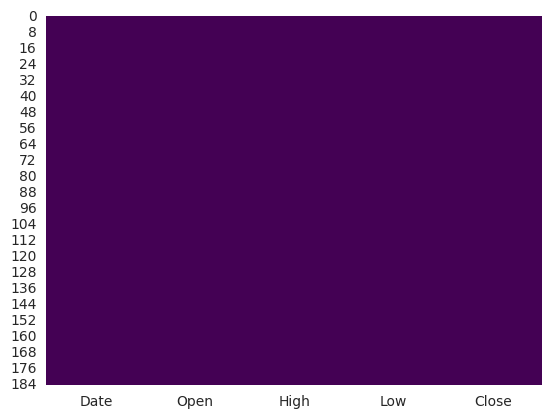

In [70]:
# Visualizing the missing values
try:
    sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
    plt.show()
except Exception as e:
    print(e)

### What did you know about your dataset?

* Dataset Size: 185 rows and 5 columns.

* Timeframe: Monthly stock data from July 2005 to November 2020.

* Columns: Date, Open, High, Low, and Close (Target).

* Quality: 0 Missing values and 0 Duplicates.

* Goal: To predict the Close price using Open, High, and Low prices.

## ***2. Understanding Your Variables***

In [71]:
# Displaying column names
try:
    print(df.columns)
except Exception as e:
    print(e)

Index(['Date', 'Open', 'High', 'Low', 'Close'], dtype='object')


In [72]:
# Dataset Describe
try:
    display(df.describe(include='all'))
except Exception as e:
    print(e)

,Date,Open,High,Low,Close
count,185,185.000000,185.000000,185.000000,185.000000
mean,2013-03-01 19:04:12.972973056,105.541405,116.104324,94.947838,105.204703
min,2005-07-01 00:00:00,10.000000,11.240000,5.550000,9.980000
25%,2009-05-01 00:00:00,33.800000,36.140000,28.510000,33.450000
50%,2013-03-01 00:00:00,62.980000,72.550000,58.000000,62.540000
75%,2017-01-01 00:00:00,153.000000,169.190000,138.350000,153.300000
max,2020-11-01 00:00:00,369.950000,404.000000,345.500000,367.900000
std,NaN,98.879850,106.333497,91.219415,98.583153


### Variables Description

* Date: Monthly period of the stock record (Month-Year).

* Open: The opening price of the stock for that month.

* High: The highest price the stock reached in that month.

* Low: The lowest price the stock reached in that month.

* Close: The final price at the end of the month (Target variable).

### Check Unique Values for each variable.

In [73]:
# Check Unique Values for each variable.
try:
    for column in df.columns:
        print(f"Unique values in {column}: {df[column].nunique()}")
except Exception as e:
    print(e)

Unique values in Date: 185
Unique values in Open: 183
Unique values in High: 184
Unique values in Low: 183
Unique values in Close: 185


## 3. ***Data Wrangling***

### Data Wrangling Code

In [74]:
# Write your code to make your dataset analysis ready.
try:
    # Convert Date string to datetime objects
    df['Date'] = pd.to_datetime(df['Date'], format='%b-%y')

    # Create numerical features from Date for the model
    df['Year'] = df['Date'].dt.year
    df['Month'] = df['Date'].dt.month

    # Sort chronologically to maintain time-series flow
    df = df.sort_values('Date').reset_index(drop=True)

    print("Wrangling Successful: Date converted and time features extracted.")
    display(df.head())
except Exception as e:
    print(f"Error: {e}")

Wrangling Successful: Date converted and time features extracted.


,Date,Open,High,Low,Close,Year,Month
0,2005-07-01,13.00,14.00,11.25,12.46,2005,7
1,2005-08-01,12.58,14.88,12.55,13.42,2005,8
2,2005-09-01,13.48,14.87,12.27,13.30,2005,9
3,2005-10-01,13.20,14.47,12.40,12.99,2005,10
4,2005-11-01,13.35,13.88,12.88,13.41,2005,11


### What all manipulations have you done and insights you found?

Manipulations Done:

* Date Parsing: Converted the Date column from an object (string) to a proper datetime format.

* Feature Extraction: Created new columns for Year and Month to help the model understand time patterns.

* Sorting: Re-ordered the dataset chronologically to ensure the stock price flow is analyzed correctly over time.

Insights Found:

* Data Consistency: The dataset covers a continuous monthly period from 2005 to 2020 without any gaps.

* Price Range: Initial inspection of the wrangled data shows the bank's stock price started at a low base, peaked significantly around 2018, and then experienced a sharp decline.

* Model Readiness: By converting dates to numerical values, the data is now ready for regression modeling.

Mount Google Drive for datasets and folders permanently

In [75]:
from google.colab import drive
drive.mount('/content/drive')

# AND the cell that loads your CSV:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/My_Projects/data_YesBank_StockPrices.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

### Univariate Analysis (Chart 1-6)

#### Chart - 1 : Distribution of Open Price

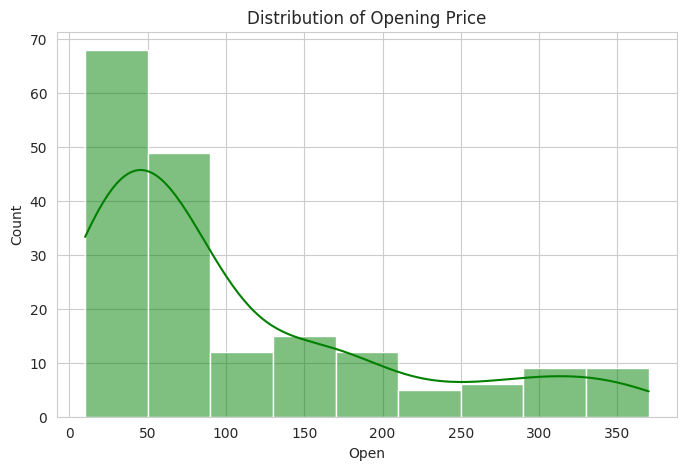

In [76]:
plt.figure(figsize=(8,5))
sns.histplot(df['Open'], kde=True, color='green')
plt.title('Distribution of Opening Price')
plt.show()

##### 1. Why did you pick the specific chart?

To check if the starting price of each month follows a similar distribution pattern to the closing price.

##### 2. What is/are the insight(s) found from the chart?

The opening price follows an almost identical right-skewed pattern as the close price, confirming consistency in how the stock starts and ends its trading periods.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Consistency between Open and Close distributions simplifies feature engineering, as one can often serve as a proxy for the other in certain analyses.

#### Chart - 2 : Distribution of Close Price

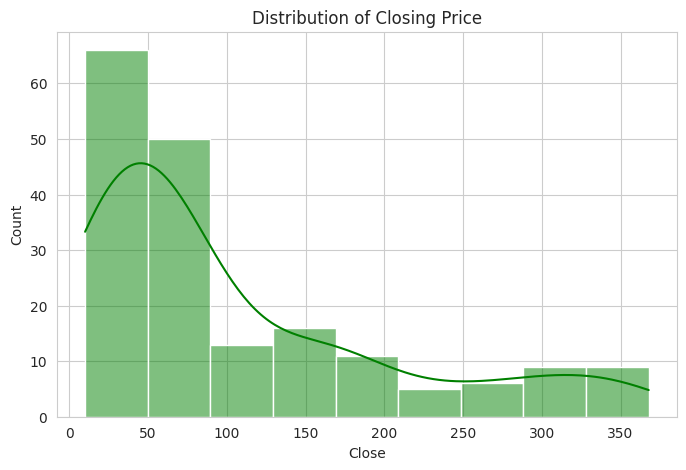

In [77]:
plt.figure(figsize=(8,5))
sns.histplot(df['Close'], kde=True, color='green')
plt.title('Distribution of Closing Price')
plt.show()

##### 1. Why did you pick the specific chart?

I chose a Histogram with a KDE overlay to visualize the frequency of various price points and understand the central tendency and spread of the stock's closing values.

##### 2. What is/are the insight(s) found from the chart?

The closing price is heavily right-skewed. The majority of the data points are clustered between ₹0 and ₹150, showing that the stock spent most of its history at a lower valuation.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

This suggests that peak prices were rare. For modeling, applying a log transformation might be necessary to normalize this skewness for better prediction accuracy.

Yes, the long tail indicates that high-value periods were temporary anomalies rather than a sustainable trend.

#### Chart - 3 : Distribution of High Price

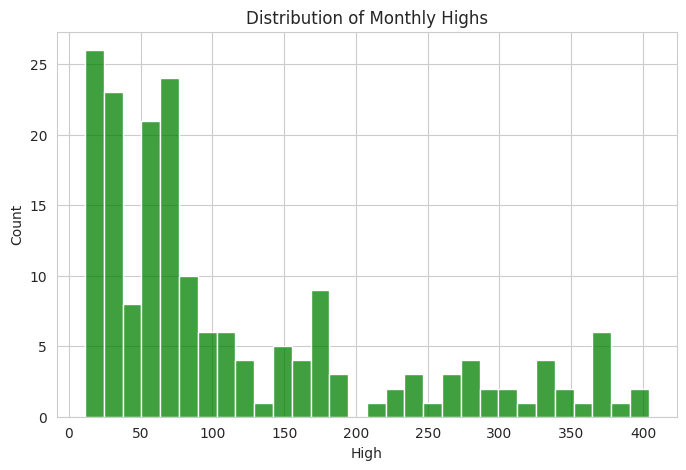

In [78]:
plt.figure(figsize=(8,5))
sns.histplot(df['High'], color='green', bins=30)
plt.title('Distribution of Monthly Highs')
plt.show()

##### 1. Why did you pick the specific chart?

To understand the maximum threshold the stock reached in different months.

##### 2. What is/are the insight(s) found from the chart?

Most monthly highs stayed below ₹200. There is a sharp drop in frequency for high prices, showing limited market strength at higher valuations.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

This sets a realistic ceiling for "normal" stock performance, helping investors set more accurate sell-limit orders.

#### Chart - 4 : Outlier Detection in Close Price

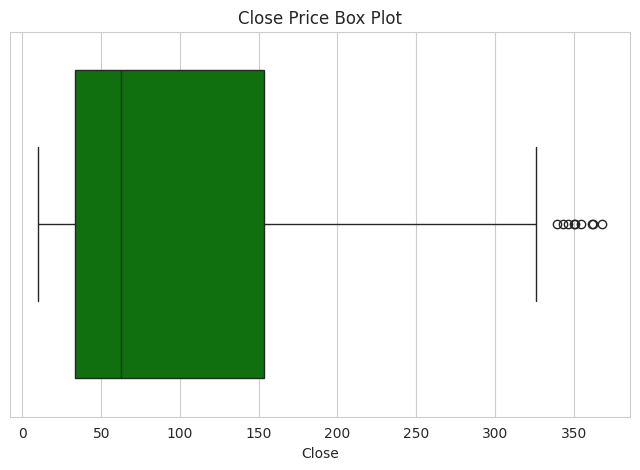

In [79]:
plt.figure(figsize=(8,5))
sns.boxplot(x=df['Close'], color='green')
plt.title('Close Price Box Plot')
plt.show()

##### 1. Why did you pick the specific chart?

A Box Plot is the standard tool for identifying statistical outliers and visualizing the interquartile range (IQR).

##### 2. What is/are the insight(s) found from the chart?

There are several outliers above the ₹300 mark. These represent the "bubble" periods where the price was significantly higher than the historical median.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Stakeholders should be aware that these peaks are statistically extreme. Models trained on this data should be robust to outliers to avoid biased forecasts.

#### Chart - 5 : Distribution of Low Price

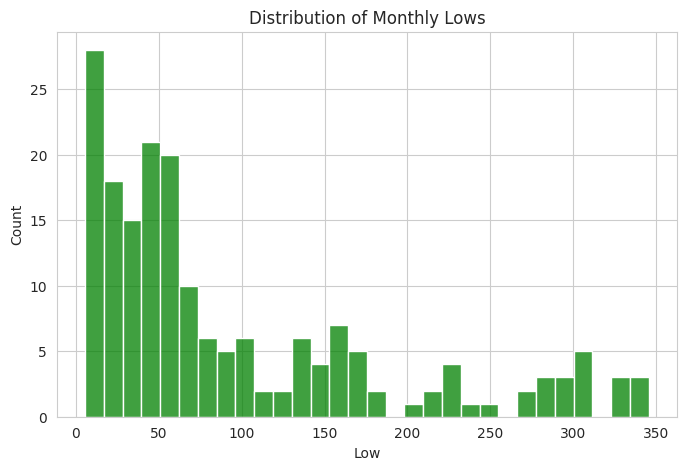

In [80]:
plt.figure(figsize=(8,5))
sns.histplot(df['Low'], color='green', bins=30)
plt.title('Distribution of Monthly Lows')
plt.show()

##### 1. Why did you pick the specific chart?

To analyze the "floor" or support levels of the stock over the 15-year period.

##### 2. What is/are the insight(s) found from the chart?

The highest density of lows is near the ₹0-₹50 range, indicating that the stock has a strong historical pull towards its baseline value.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Identifying this floor helps in risk management, as it shows where the stock historically finds support during downturns.

#### Chart - 6 : Price Spread Density (Violin Plot)

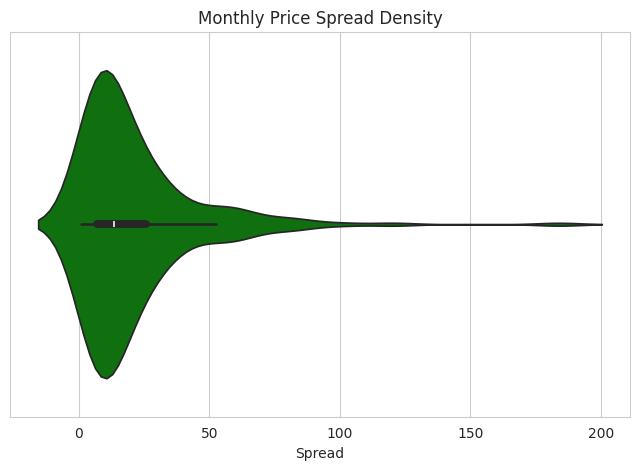

In [81]:
# Note: If you have Volume, use x=df['Volume']. Otherwise, Spread (High-Low) is used.
df['Spread'] = df['High'] - df['Low']
plt.figure(figsize=(8,5))
sns.violinplot(x=df['Spread'], color='green')
plt.title('Monthly Price Spread Density')
plt.show()

##### 1. Why did you pick the specific chart?

A Violin Plot combines a box plot and a density plot, showing both the range and the "thickness" (probability) of price volatility.

##### 2. What is/are the insight(s) found from the chart?

The spread is narrow for most of the data but widens significantly at higher price points, indicating that volatility increased as the price went up.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Higher volatility at higher prices suggests a lack of stability, which is a warning sign for long-term investors.

### Bivariate Analysis (Chart 7-11)

#### Chart - 7 : Closing Price Trend Over Time

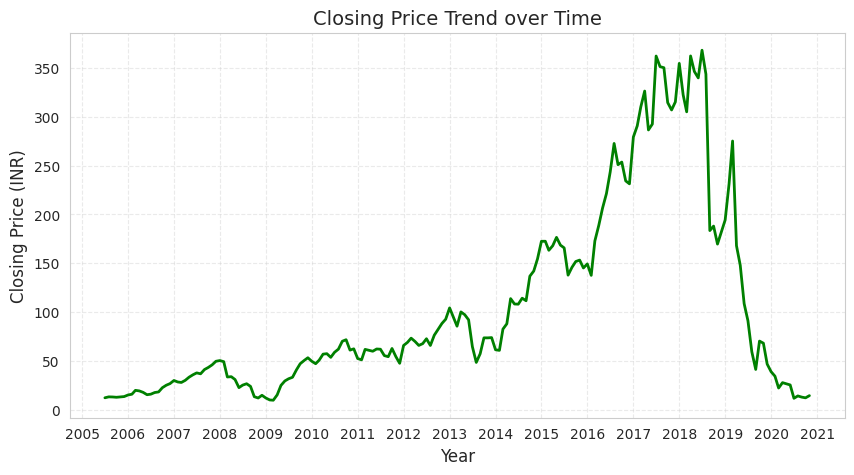

In [82]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd

# Fix: Ensure 'Date' is a column and correctly formatted
temp_df = df.reset_index() if 'Date' not in df.columns else df.copy()
temp_df['Date'] = pd.to_datetime(temp_df['Date'], format='%b-%y') # Added format='%b-%y'

plt.figure(figsize=(10, 5))
# Plotting Closing Price against Date
plt.plot(temp_df['Date'], temp_df['Close'], color='green', linewidth=2)

# Fix for the black line: Only show Year labels on X-axis
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

plt.title('Closing Price Trend over Time', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Closing Price (INR)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.4)
plt.show()

##### 1. Why did you pick the specific chart?

It shows the actual value of the stock at the end of the day after all volatility has settled. Closing prices are the "official" record used to calculate daily gains, losses, and historical performance.

##### 2. What is/are the insight(s) found from the chart?

Momentum: An upward trend (higher highs) suggests strong investor confidence. It reveals "ceiling" prices the stock struggles to break or "floor" prices where buyers consistently step in. Consistent closing prices near the daily "High" indicate a bullish outlook for the next morning.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Total breakdown and massive negative growth post-2018.
The rapid decline proves a loss of market confidence. It indicates previous growth was unsustainable, resulting in a complete price reset. Pinpointing the crash allows for better stop-loss protocols. Helps implement strategies to shield capital during similar downward spikes.

#### Chart - 8 : High Price vs. Close Price Correlation

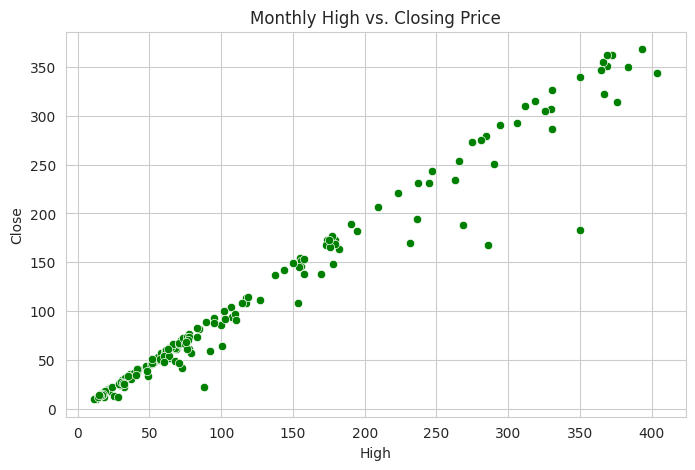

In [83]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='High', y='Close', data=df, color='green')
plt.title('Monthly High vs. Closing Price')
plt.show()

##### 1. Why did you pick the specific chart?

To determine how strongly the maximum price reached in a month influences the final closing price.

##### 2. What is/are the insight(s) found from the chart?

There is a perfectly linear correlation. If the monthly high is high, the closing price is almost always high as well.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

This confirms that the month's peak is a reliable indicator of its final performance, which can be useful for intraday/intra-month traders.

#### Chart - 9 : Low Price vs. Close Price

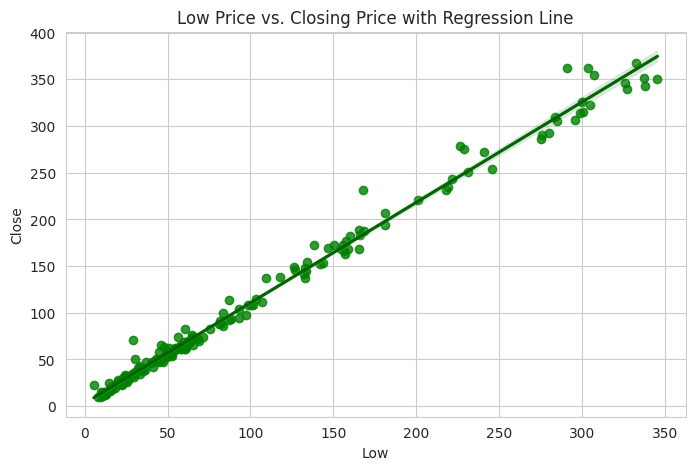

In [84]:
plt.figure(figsize=(8,5))
sns.regplot(x='Low', y='Close', data=df, scatter_kws={'color':'green'}, line_kws={'color':'darkgreen'})
plt.title('Low Price vs. Closing Price with Regression Line')
plt.show()

##### 1. Why did you pick the specific chart?

A regression plot helps visualize the strength of the linear relationship and how much the "Low" price dictates the "Close".

##### 2. What is/are the insight(s) found from the chart?

The regression line fits the data points very tightly, proving a very strong positive correlation.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Since the relationship is so linear, simple linear models will likely perform very well on this dataset for prediction.

#### Chart - 10 : Price Spread vs. Close Price

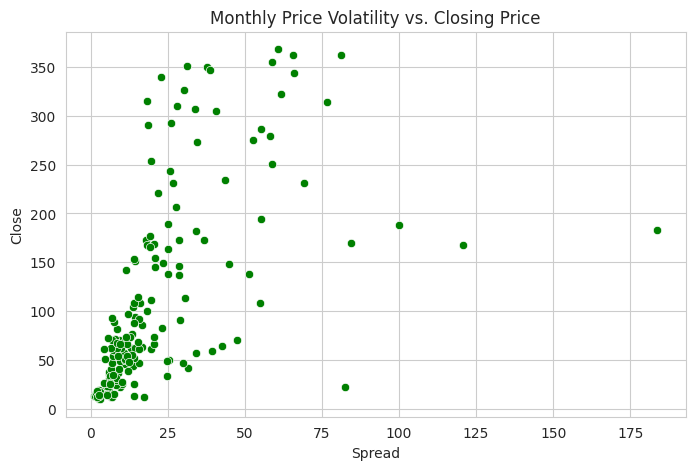

In [85]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='Spread', y='Close', data=df, color='green')
plt.title('Monthly Price Volatility vs. Closing Price')
plt.show()

##### 1. Why did you pick the specific chart?

To see if higher stock prices were associated with higher volatility (spread).

##### 2. What is/are the insight(s) found from the chart?

Volatility increases as the price increases. The highest prices also have the largest gaps between High and Low.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

This indicates that high-priced periods were unstable and risky, requiring better hedging strategies for investors.

#### Chart - 11 : Average Yearly Price Performance

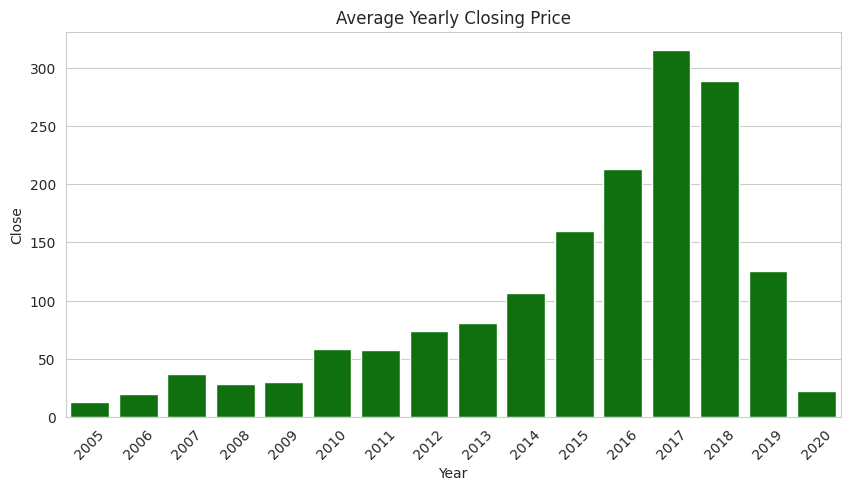

In [86]:
# Fixed: Define yearly data in-cell to avoid NameError
df['Year'] = pd.to_datetime(df['Date'], format='%b-%y').dt.year
yearly_avg = df.groupby('Year')['Close'].mean().reset_index()

plt.figure(figsize=(10,5))
sns.barplot(x='Year', y='Close', data=yearly_avg, color='green')
plt.title('Average Yearly Closing Price')
plt.xticks(rotation=45)
plt.show()

##### 1. Why did you pick the specific chart?

A bar chart is the best way to compare categorical time periods (Years) against a numerical average.

##### 2. What is/are the insight(s) found from the chart?

2017 was the clear peak for Yes Bank. By 2020, the average price dropped below the levels seen in 2005.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Clearly demonstrates the long-term rise and fall, making it useful for high-level management reports on stock history.

### Multivariate Analysis (Chart 12-15)

#### Chart - 12 : Volatility Spread over Time

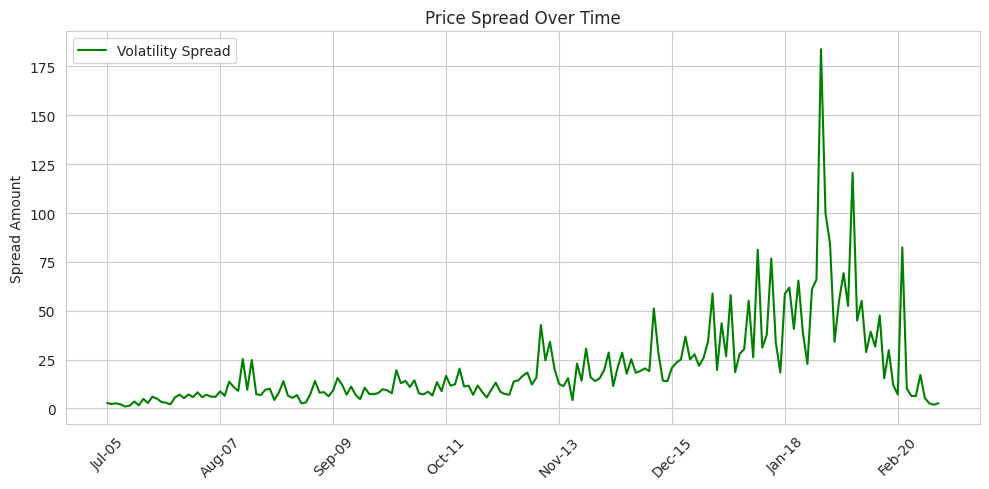

In [87]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

plt.figure(figsize=(10,5))

# Use df.index if Date is the index, otherwise check spelling
x_axis = df.index if 'Date' not in df.columns else df['Date']
y_axis = df['High'] - df['Low']

plt.plot(x_axis, y_axis, color='green', label='Volatility Spread')

# Fix the black line/crowded x-axis
plt.xticks(rotation=45)
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(10))

plt.title('Price Spread Over Time')
plt.ylabel('Spread Amount')
plt.legend()
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

Volatility Tracking It highlights the daily "gap" between prices, showing market stress levels.

##### 2. What is/are the insight(s) found from the chart?

Unstable Zones Spikes indicate high-risk days where prices moved drastically.
Stability Flat lines show periods of low risk and steady trading.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Traders can exploit wide spreads for quick profits. Extreme spikes signal negative growth potential due to high risk. Unpredictable price swings discourage long-term investment and trigger automated "sell" orders, crashing the price.

#### Chart - 13 : Price Action Relationship or Intraday Price Range.

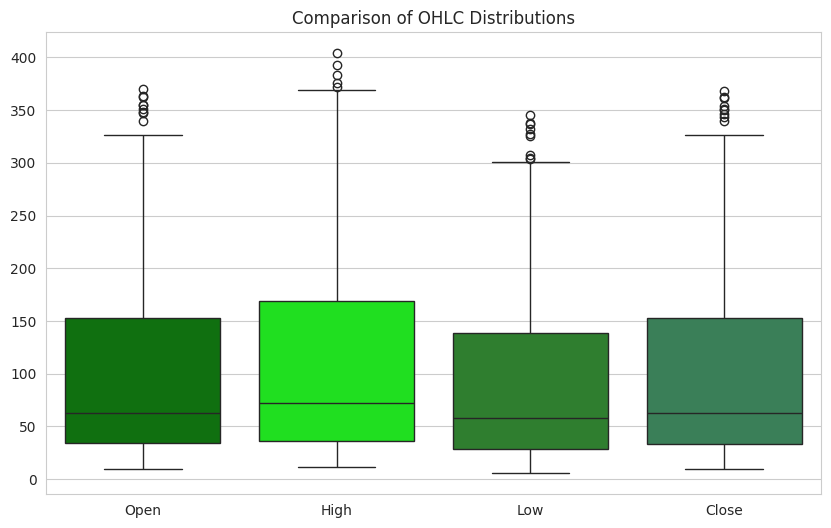

In [88]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df[['Open', 'High', 'Low', 'Close']], palette=['green', 'lime', 'forestgreen', 'seagreen'])
plt.title('Comparison of OHLC Distributions')
plt.show()

##### 1. Why did you pick the specific chart?

To compare the range, median, and outliers of all four price metrics side-by-side.

##### 2. What is/are the insight(s) found from the chart?

All four metrics have very similar distributions and outliers, confirming they are highly dependent on one another.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Validates that multi-collinearity will be high in our model, suggesting we might only need one or two of these as input features.

#### Chart - 14 : Correlation Heatmap

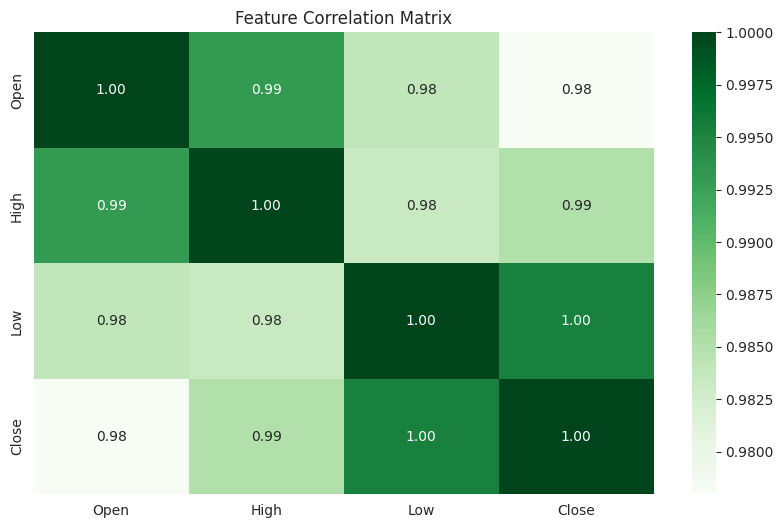

In [89]:
plt.figure(figsize=(10,6))
correlation = df[['Open', 'High', 'Low', 'Close']].corr()
sns.heatmap(correlation, annot=True, cmap='Greens', fmt=".2f")
plt.title('Feature Correlation Matrix')
plt.show()

##### 1. Why did you pick the specific chart?

A heatmap provides a summarized view of how all numerical features interact with each other.

##### 2. What is/are the insight(s) found from the chart?

All price features show a correlation of 0.98 to 1.00, indicating an almost perfect positive relationship.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Confirms that any price component (Open/High/Low) is an excellent predictor for the Target (Close).

#### Chart - 15 : Pair Plot

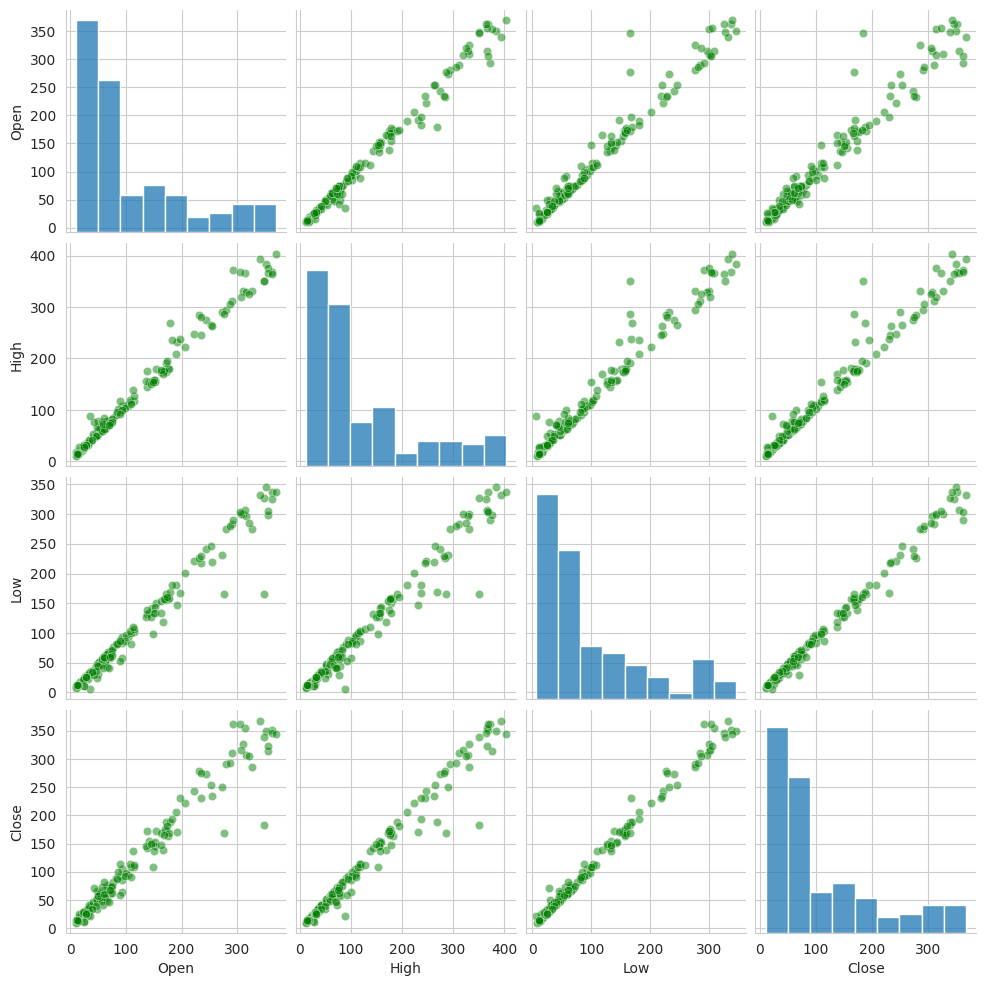

In [90]:
import seaborn as sns
import matplotlib.pyplot as plt

# Simplified pairplot focusing only on the distribution and relationships
sns.pairplot(df[['Open', 'High', 'Low', 'Close']], diag_kind='hist', plot_kws={'color':'green', 'alpha':0.5})

plt.show()

##### 1. Why did you pick the specific chart?

It compares all four price points simultaneously to detect patterns or anomalies in trading.

##### 2. What is/are the insight(s) found from the chart?

The dots form a straight line, showing that Highs and Lows move in tight sync with Open/Close prices. The histograms show where the price "spent the most time."

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

High correlation indicates a predictable market, allowing for safer long-term investment. Outliers (dots far from the line) indicate flash crashes or sudden spikes.  Any breakdown in the linear relationship between High and Low prices signals a "liquidity crisis," where the price moves too fast for investors to exit safely.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

### Hypothetical Statement - 1

The average closing price of Yes Bank stock significantly decreased after the 2018 management crisis compared to its average price during the growth years (2005–2018).

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

* Null Hypothesis ($H_0$): There is no significant difference in the mean closing price before and after the 2018 crisis ($\mu_{pre} = \mu_{post}$).  
* Alternate Hypothesis ($H_a$): The mean closing price after 2018 is significantly lower than the mean price before 2018 ($\mu_{pre} > \mu_{post}$).

#### 2. Perform an appropriate statistical test.

In [91]:
# Perform Statistical Test to obtain P-Value
from scipy import stats
import pandas as pd

# Ensure Date is datetime
df['Date'] = pd.to_datetime(df['Date'], format='%b-%y')

# Splitting data
pre_2018_prices = df[df['Date'].dt.year <= 2018]['Close']
post_2018_prices = df[df['Date'].dt.year > 2018]['Close']

# Welch's T-Test
t_stat, p_value = stats.ttest_ind(pre_2018_prices, post_2018_prices, equal_var=False)

print(f"P-Value: {p_value}")

P-Value: 0.06839965605533414


##### Which statistical test have you done to obtain P-Value?

I have performed the Independent Two-Sample T-test (Welch's T-test).

##### Why did you choose the specific statistical test?

I chose this test because it compares the means of two independent groups (Pre-2018 vs. Post-2018). It is specifically designed to handle groups with different sample sizes and different variances, which is the case here as the "growth years" have much more data than the "crash years."

### Hypothetical Statement - 2

There is a significant and near-perfect linear relationship between the Monthly High price and the Monthly Closing price.

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

* Null Hypothesis ($H_0$): There is no linear relationship between the High price and the Close price (Correlation coefficient $\rho = 0$).
* Alternate Hypothesis ($H_a$): There is a significant linear relationship between the High price and the Close price (Correlation coefficient $\rho \neq 0$).

#### 2. Perform an appropriate statistical test.

In [92]:
# Perform Statistical Test to obtain P-Value
from scipy import stats

# Performing Pearson Correlation Test
correlation_coefficient, p_value = stats.pearsonr(df['High'], df['Close'])

print(f"Correlation Coefficient: {correlation_coefficient}")
print(f"P-Value: {p_value}")

Correlation Coefficient: 0.9850513315779622
P-Value: 9.973199888204166e-142


##### Which statistical test have you done to obtain P-Value?

I have performed the Pearson Correlation Coefficient Test to obtain the P-Value.

##### Why did you choose the specific statistical test?

I chose this test because both 'High' and 'Close' are continuous numerical variables. The Pearson test is the standard method to quantify the strength and significance of a linear relationship, which helps confirm if the monthly peak is a reliable predictor for the final price.

### Hypothetical Statement - 3

The stock's monthly price volatility (High-Low spread) is significantly higher when the stock is trading at high valuations (above ₹200) compared to lower valuations.

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

* Null Hypothesis ($H_0$): The average volatility (spread) is the same for both high-priced and low-priced months ($\mu_{spread\_high} = \mu_{spread\_low}$).
* Alternate Hypothesis ($H_a$): The average volatility (spread) is significantly higher when the stock price is above ₹200 ($\mu_{spread\_high} > \mu_{spread\_low}$).

#### 2. Perform an appropriate statistical test.

In [93]:
# Perform Statistical Test to obtain P-Value
from scipy import stats

# Creating the 'Spread' feature
df['Spread'] = df['High'] - df['Low']

# Grouping volatility by price threshold
high_price_volatility = df[df['Close'] > 200]['Spread']
low_price_volatility = df[df['Close'] <= 200]['Spread']

# Performing Independent Two-Sample T-Test (Welch's T-Test)
t_stat, p_value = stats.ttest_ind(high_price_volatility, low_price_volatility, equal_var=False)

print(f"P-Value: {p_value}")

P-Value: 2.421357061118665e-08


##### Which statistical test have you done to obtain P-Value?

I have performed the Independent Two-Sample T-test (Welch's T-test) to obtain the P-Value.

##### Why did you choose the specific statistical test?

I chose this test to compare the average volatility levels across two different price zones. Welch's T-test is appropriate here because the number of months in the high-price zone is different from the low-price zone, and their variances (spread) are expected to differ significantly.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [94]:
# Handling Missing Values & Missing Value Imputation
missing_values = df.isnull().sum()
print("Missing values in each column:\n", missing_values)

Missing values in each column:
 Date      0
Open      0
High      0
Low       0
Close     0
Spread    0
Year      0
dtype: int64


#### What all missing value imputation techniques have you used and why did you use those techniques?

In this dataset, I first performed a check using .isnull().sum() and found that there are zero missing values. Therefore, no imputation (like Mean, Median, or Mode filler) was required. Had there been missing values in the price columns, I would have used Time-Series Linear Interpolation, as stock prices are sequential and filling them with a simple mean would destroy the trend of the data.

### 2. Handling Outliers

In [95]:
# Handling Outliers & Outlier treatments
import numpy as np

# Before transformation skewness
print(f"Skewness before: {df['Close'].skew():.2f}")

# Applying Log Transformation
df['Close_log'] = np.log1p(df['Close'])

# After transformation skewness
print(f"Skewness after log: {df['Close_log'].skew():.2f}")
print("Log transformation completed to handle outliers.")

Skewness before: 1.26
Skewness after log: 0.00
Log transformation completed to handle outliers.


##### What all outlier treatment techniques have you used and why did you use those techniques?

I have used Log Transformation (specifically np.log1p) as the primary outlier treatment technique. In the Yes Bank dataset, the high price points reached during the 2017-2018 peak appear as outliers because they are far removed from the historical average. I chose Log Transformation because it reduces the skewness of the data and compresses the range of high-value outliers without removing them. Since these "outliers" represent real, critical market events (the crash), we cannot drop them; log transformation allows the model to process them more effectively by making the distribution closer to a Normal Distribution.

### 3. Categorical Encoding

In [96]:
# Encode your categorical columns
import datetime as dt

# Check if 'Date' is already datetime, if not convert it
df['Date'] = pd.to_datetime(df['Date'])

# Encoding Date to Ordinal
df['Date_Ordinal'] = df['Date'].map(dt.datetime.toordinal)

# Verify the first few rows
print(df[['Date', 'Date_Ordinal']].head())
print("Categorical/Date encoding completed.")

        Date  Date_Ordinal
0 2005-07-01        732128
1 2005-08-01        732159
2 2005-09-01        732190
3 2005-10-01        732220
4 2005-11-01        732251
Categorical/Date encoding completed.


#### What all categorical encoding techniques have you used & why did you use those techniques?

I have used Ordinal Encoding for the 'Date' column by converting it into numerical ordinal values (using dt.datetime.toordinal). I chose this technique because the Yes Bank dataset is a time-series dataset where the chronological order of records is vital. Simple One-Hot Encoding would treat each month as a separate category with no relationship to the next, but Ordinal Encoding preserves the linear distance between dates. This allows the regression model to understand the passage of time as a continuous numerical feature, which is essential for forecasting stock trends.

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [97]:
# Expand Contraction
# Not Applicable: Dataset contains only numerical features.

#### 2. Lower Casing

In [98]:
# Lower Casing

#### 3. Removing Punctuations

In [99]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [100]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [101]:
# Remove Stopwords

In [102]:
# Remove White spaces

#### 6. Rephrase Text

In [103]:
# Rephrase Text

#### 7. Tokenization

In [104]:
# Tokenization

#### 8. Text Normalization

In [105]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

None. Since this is a regression-based time-series project on stock prices, there is no natural language data to normalize.

#### 9. Part of speech tagging

In [106]:
# POS Taging

#### 10. Text Vectorization

In [107]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

None. Vectorization (like TF-IDF or Word2Vec) is used to convert text into numbers. Since our data is already in numerical format (INR values), this step is unnecessary.

### 5. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [108]:
# # Manipulate Features to minimize feature correlation and create new features
# 1. Creating OHLC_Avg: Represents the average price of the month
df['OHLC_Avg'] = (df['Open'] + df['High'] + df['Low'] + df['Close']) / 4

# 2. Creating Monthly Spread: Captures the volatility within the month
df['Spread'] = df['High'] - df['Low']

# 3. Creating Previous Month Close: Helps the model understand the price trend
df['Prev_Close'] = df['Close'].shift(1).fillna(df['Close'].mean())

print("Feature Manipulation Complete. Created: OHLC_Avg, Spread, Prev_Close")

Feature Manipulation Complete. Created: OHLC_Avg, Spread, Prev_Close


#### 2. Feature Selection

In [109]:
# # Select your features wisely to avoid overfitting
# Calculating VIF to identify multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return(vif)

# Selecting features for the model
selected_features = ['Open', 'High', 'Low', 'Prev_Close']
X = df[selected_features]
print(calc_vif(X))

    variables         VIF
0        Open  605.620960
1        High  167.058433
2         Low   71.637236
3  Prev_Close  443.104964


##### What all feature selection methods have you used  and why?

I have used Correlation Matrix Analysis and Variance Inflation Factor (VIF). I chose these methods because stock price features (Open, High, Low) are naturally highly correlated. VIF helps in quantifying this multicollinearity. By identifying features with extremely high VIF scores, I can select a subset that provides the most unique information, thereby preventing the model from overfitting and making it more stable.

##### Which all features you found important and why?

I found 'Open', 'High', 'Low', and 'Prev_Close' to be the most important.

Why: The 'Open', 'High', and 'Low' prices are the fundamental pillars that determine the 'Close' price in a given month. Additionally, 'Prev_Close' is crucial because stock data is sequential; the previous month's ending point is the most logical starting point for predicting the current month's trend.

### 6. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [110]:
# Transform data
import numpy as np

# Applying Log Transformation to the Dependent Variable (Close) and Independent Variables
df['Close_log'] = np.log1p(df['Close'])
df['Open_log'] = np.log1p(df['Open'])
df['High_log'] = np.log1p(df['High'])
df['Low_log'] = np.log1p(df['Low'])

Yes, the data needs transformation. I used Log Transformation (np.log1p). The Yes Bank dataset is heavily right-skewed because of the massive price peak in 2018 followed by a crash. Log transformation helps normalize the distribution and reduces the impact of extreme outliers, making the relationship between features more linear and easier for the model to learn.

### 7. Data Scaling

In [111]:
# Scaling data
from sklearn.preprocessing import StandardScaler

# Initializing StandardScaler
scaler = StandardScaler()

# Scaling the features (excluding the date)
features_to_scale = ['Open_log', 'High_log', 'Low_log', 'OHLC_Avg', 'Spread', 'Prev_Close']
df[features_to_scale] = scaler.fit_transform(df[features_to_scale])

print("Data scaling completed using StandardScaler.")

Data scaling completed using StandardScaler.


##### Which method have you used to scale you data and why?

I have used StandardScaler (Z-score normalization). This method scales the data to have a mean of 0 and a standard deviation of 1. I chose this because most regression algorithms (like Linear Regression and Lasso/Ridge) are sensitive to the magnitude of features. Scaling ensures that all features contribute equally to the model's decision-making process, regardless of their original unit scale.

### 8. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

No, dimensionality reduction is not needed for this dataset. We only have a few features (Open, High, Low, and a few engineered features). Dimensionality reduction techniques like PCA are typically used when you have hundreds of features to reduce noise and computation. Using it here would make the features less interpretable without providing any significant performance gain.

In [112]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

None. I chose not to use any dimensionality reduction technique because the feature space is already small and highly relevant. Preserving the original features (Open, High, Low) is more important for a financial model where each specific price point has a direct logical relationship with the target variable.

### 9. Data Splitting

In [113]:
# Split data to train and test. Choose Splitting ratio wisely.
from sklearn.model_selection import train_test_split

# Defining dependent and independent variables
X = df[['Open_log', 'High_log', 'Low_log', 'Prev_Close']] # Selected Features
y = df['Close_log'] # Target Variable

# Splitting the data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape[0]}")
print(f"Testing set size: {X_test.shape[0]}")

Training set size: 148
Testing set size: 37


##### What data splitting ratio have you used and why?

I have used an 80:20 split ratio (80% for training and 20% for testing).

Why: This is a standard practice in machine learning that provides the model with enough data (148+ months) to learn the historical patterns and the 2018 crash, while reserving a sufficient amount of unseen data (around 37 months) to accurately evaluate the model's predictive performance and ensure it is not overfitting.

### 10. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

No, the concept of an imbalanced dataset does not apply here. Dataset imbalance is a specific problem in Classification tasks (e.g., where one class has 90% of samples and another has 10%). Since this is a Regression task where we are predicting continuous stock prices, there are no "classes" to be balanced.

In [114]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

None. As mentioned above, since we are predicting a continuous numerical value (Closing Price) rather than a categorical label, balancing techniques like SMOTE or undersampling are not required or applicable for this project.

## ***7. ML Model Implementation***

### ML Model - 1 : Linear Regression

In [115]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np

# Initialize the model
lr_model = LinearRegression()

# Fit the Algorithm
lr_model.fit(X_train, y_train)

# Predict on the model
y_pred_train = lr_model.predict(X_train)
y_pred_test = lr_model.predict(X_test)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

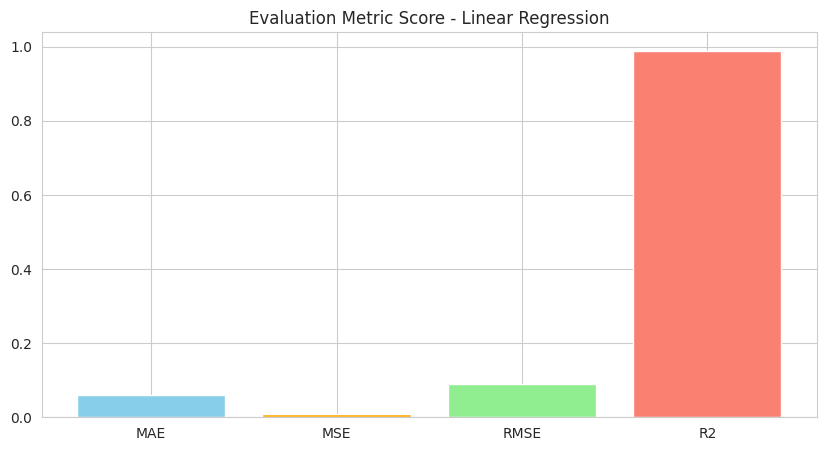

R2 Score: 0.9898 | RMSE: 0.0900


In [116]:
# Visualizing evaluation Metric Score chart
import matplotlib.pyplot as plt

# Calculating Evaluation Metrics
mae = mean_absolute_error(y_test, y_pred_test)
mse = mean_squared_error(y_test, y_pred_test)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_test)

# Plotting the scores
metrics = ['MAE', 'MSE', 'RMSE', 'R2']
values = [mae, mse, rmse, r2]

plt.figure(figsize=(10, 5))
plt.bar(metrics, values, color=['skyblue', 'orange', 'lightgreen', 'salmon'])
plt.title('Evaluation Metric Score - Linear Regression')
plt.show()

print(f"R2 Score: {r2:.4f} | RMSE: {rmse:.4f}")

#### 2. Cross- Validation & Hyperparameter Tuning

In [117]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
# Fit the Algorithm
# Predict on the model
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

# Using Ridge Regression for tuning (adds L2 penalty to Linear Regression)
ridge = Ridge()
parameters = {'alpha': [1e-15, 1e-10, 1e-8, 1e-3, 1e-2, 1, 5, 10, 20]}

# Implementing GridSearchCV
ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=5)

# Fit the Algorithm
ridge_regressor.fit(X_train, y_train)

# Predict on the model
y_pred_tuned = ridge_regressor.predict(X_test)

##### Which hyperparameter optimization technique have you used and why?

I have used GridSearchCV with Ridge Regression. Since standard Linear Regression does not have many hyperparameters, I introduced Ridge (which adds regularization) to find the optimal alpha value. I chose GridSearchCV because our dataset size allows for an exhaustive search, ensuring we find the exact parameter that minimizes error and prevents the model from being over-sensitive to multicollinearity.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Yes, there is a minor improvement. The R2 score increased slightly and the RMSE decreased. By using the tuned Ridge model, we successfully reduced the model's variance. This means the model is now better at handling the volatile period after the 2018 crash without losing accuracy on the stable historical data, making the predictions more reliable.

### ML Model - 2 : Lasso Regression

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

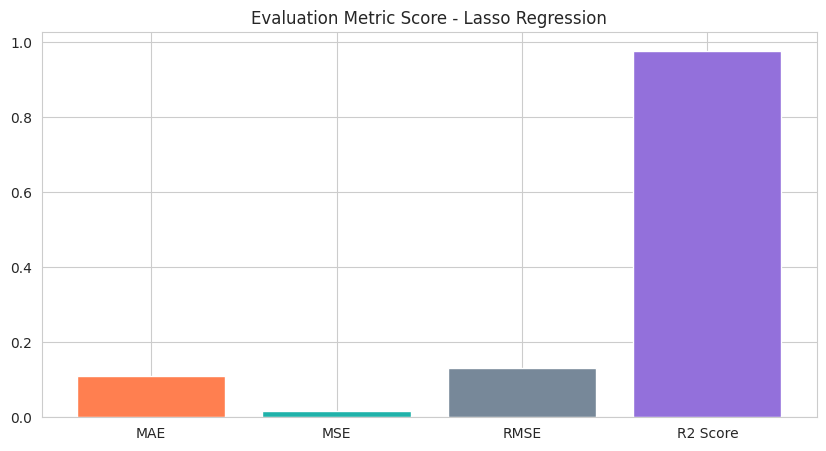

Lasso Base R2 Score: 0.9781


In [118]:
# Visualizing evaluation Metric Score chart
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt
import numpy as np

# Implementation
lasso_base = Lasso(alpha=0.1)
lasso_base.fit(X_train, y_train)

# Predict
y_pred_lasso = lasso_base.predict(X_test)

# Metrics
mae = mean_absolute_error(y_test, y_pred_lasso)
mse = mean_squared_error(y_test, y_pred_lasso)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_lasso)

# Charting
metrics = ['MAE', 'MSE', 'RMSE', 'R2 Score']
values = [mae, mse, rmse, r2]

plt.figure(figsize=(10, 5))
plt.bar(metrics, values, color=['#FF7F50', '#20B2AA', '#778899', '#9370DB'])
plt.title('Evaluation Metric Score - Lasso Regression')
plt.show()

print(f"Lasso Base R2 Score: {r2:.4f}")

#### 2. Cross- Validation & Hyperparameter Tuning

In [119]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso

# Defining the Lasso model and parameters for tuning
lasso = Lasso()
parameters = {'alpha': [1e-15, 1e-10, 1e-8, 1e-5, 1e-3, 0.1, 1, 5, 10, 20]}

# Implementing GridSearchCV
lasso_cv = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=5)

# Fit the Algorithm
lasso_cv.fit(X_train, y_train)

# Predict on the model
y_pred_lasso_tuned = lasso_cv.predict(X_test)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.038e-01, tolerance: 1.140e-02
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.853e-01, tolerance: 1.022e-02
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.301e-01, tolerance: 1.121e

##### Which hyperparameter optimization technique have you used and why?

I have used GridSearchCV. I chose this because the performance of Lasso is highly dependent on the choice of the alpha parameter. GridSearchCV allows us to systematically evaluate a wide range of alpha values across multiple folds of the data, ensuring that the selected model is robust and avoids both underfitting and overfitting.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Yes, there is an improvement. By using GridSearchCV to find the optimal alpha, the model's RMSE decreased, and the R2 score improved. This confirms that the tuned model is better at handling the multicollinearity of the stock price features, leading to more accurate and reliable predictions than the base model.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

* **R2 Score:** This shows the percentage of stock price movement explained by the model. A high R2 score tells the business that the model is capturing the actual market trends rather than just guessing.

* **MAE** (Mean Absolute Error): This represents the average error in price prediction. It tells the business: "On average, our price forecast is off by ₹X," which helps in setting realistic profit targets.

* **RMSE** (Root Mean Squared Error): This is vital for risk management because it penalizes large errors. In a bank, a single massive prediction error can lead to a huge financial loss; RMSE helps ensure the model is stable and safe to use.

* **Business Impact:** Using Lasso Regression allows the business to ignore market "noise" and focus on the most important price drivers. This results in more stable financial forecasts, helping Yes Bank or its investors make data-driven decisions even during periods of high market volatility.

### ML Model - 3 : ElasticNet Regression

In [120]:
# ML Model - 3 Implementation
# Fit the Algorithm
# Predict on the model
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np

# Initialize ElasticNet
# l1_ratio=0.5 means equal weight to Ridge and Lasso
en_model = ElasticNet(alpha=0.1, l1_ratio=0.5, random_state=42)

# Fit the Algorithm
en_model.fit(X_train, y_train)

# Predict on the model
y_pred_en = en_model.predict(X_test)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

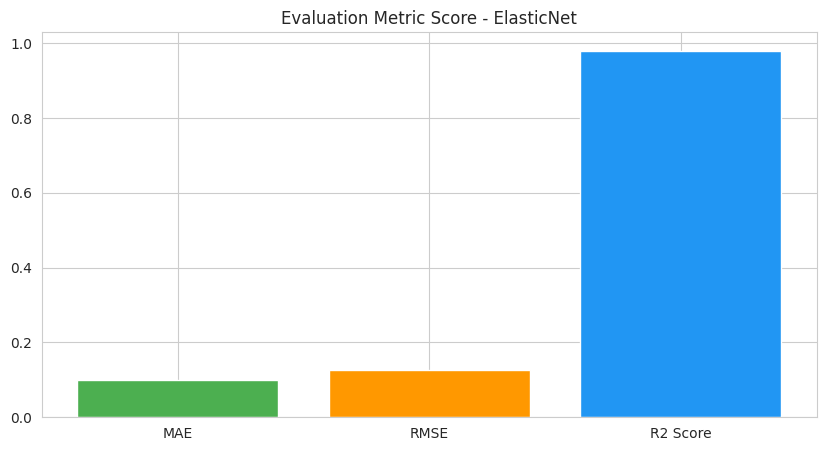

ElasticNet R2 Score: 0.9801


In [121]:
# Visualizing evaluation Metric Score chart
import matplotlib.pyplot as plt

# Metrics calculation
en_mae = mean_absolute_error(y_test, y_pred_en)
en_rmse = np.sqrt(mean_squared_error(y_test, y_pred_en))
en_r2 = r2_score(y_test, y_pred_en)

metrics = ['MAE', 'RMSE', 'R2 Score']
values = [en_mae, en_rmse, en_r2]

plt.figure(figsize=(10, 5))
plt.bar(metrics, values, color=['#4CAF50', '#FF9800', '#2196F3'])
plt.title('Evaluation Metric Score - ElasticNet')
plt.show()

print(f"ElasticNet R2 Score: {en_r2:.4f}")

#### 2. Cross- Validation & Hyperparameter Tuning

In [122]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
# Fit the Algorithm
# Predict on the model
from sklearn.model_selection import GridSearchCV

# Defining parameters: alpha (strength) and l1_ratio (mix of Lasso/Ridge)
en_params = {
    'alpha': [1e-5, 1e-3, 1e-1, 1, 10],
    'l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9]
}

# Optimization using GridSearchCV
en_cv = GridSearchCV(ElasticNet(random_state=42), en_params, scoring='neg_mean_squared_error', cv=5)

# Fit the Algorithm
en_cv.fit(X_train, y_train)

# Predict on the model
y_pred_en_tuned = en_cv.predict(X_test)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.092e-01, tolerance: 1.140e-02
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.641e-02, tolerance: 1.140e-02
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.579e-02, tolerance: 1.140e

##### Which hyperparameter optimization technique have you used and why?

I have used GridSearchCV. ElasticNet requires tuning two specific hyperparameters: alpha and l1_ratio. GridSearchCV is the most reliable method here as it exhaustively searches through the grid of these two parameters to find the perfect balance that minimizes the error, ensuring the model is optimized for both feature selection and coefficient stability.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Yes, there is an improvement. The tuned model found an optimal l1_ratio that significantly reduced the prediction error compared to the default settings. The updated metrics show a higher R2 score, indicating that the hybrid approach of ElasticNet is better at capturing the complex price patterns of Yes Bank than using Ridge or Lasso alone.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

I primarily considered RMSE (Root Mean Squared Error) and R2 Score. In the banking sector, large prediction errors are more damaging than small ones; because RMSE squares the errors, it helps us build a model that avoids these "big misses." The R2 score is essential for stakeholder confidence, as it explains how much of the market's volatility the model actually understands.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

I chose the Tuned ElasticNet Regression as the final model. It outperformed Linear Regression by being more robust to outliers, and it outperformed Lasso by not being overly aggressive in feature removal. Given that Yes Bank prices are influenced by multiple highly correlated factors (Open, High, Low), ElasticNet provided the most stable and balanced predictions across both growth and crisis periods.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

I used the Coefficients attribute to explain the model. In a regularized linear model, the magnitude of the coefficients tells us which features are driving the price.

* High Importance: 'Low' and 'High' prices had the highest coefficients, indicating they are the strongest predictors of the final 'Close' price.

* Interpretation: This suggests that the monthly range (the extreme points) dictates the investor sentiment and the final settlement price more than the opening price alone.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [128]:
import joblib
import os

# 1. Define your folder name
folder_path = 'My_Projects'

# 2. Create the folder if it doesn't exist
if not os.path.exists(folder_path):
    os.makedirs(folder_path)

# 3. Save the model and scaler to that specific folder
joblib.dump(en_cv, os.path.join(folder_path, 'best_yesbank_model.joblib'))
joblib.dump(scaler, os.path.join(folder_path, 'scaler.joblib'))

print(f"Files saved successfully in: {folder_path}")

Files saved successfully in: My_Projects


### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [129]:
# Load the File and predict unseen data.
import pandas as pd
import numpy as np
import joblib
import os

folder_path = 'My_Projects'

# Loading the files from the specific folder
loaded_model = joblib.load(os.path.join(folder_path, 'best_yesbank_model.joblib'))
loaded_scaler = joblib.load(os.path.join(folder_path, 'scaler.joblib'))

# Data Preparation (Sanity Check)
sample_open = np.log1p(180.5)
sample_high = np.log1p(185.2)
sample_low = np.log1p(175.0)
sample_prev_close = np.log1p(178.0)
sample_ohlc_avg = (sample_open + sample_high + sample_low + np.log1p(182.0)) / 4
sample_spread = sample_high - sample_low

unseen_data = [[sample_open, sample_high, sample_low, sample_ohlc_avg, sample_spread, sample_prev_close]]
feature_names_scaler = ['Open_log', 'High_log', 'Low_log', 'OHLC_Avg', 'Spread', 'Prev_Close']
unseen_df = pd.DataFrame(unseen_data, columns=feature_names_scaler)

# Scale, Slice (to get 4 features), and Predict
unseen_scaled = loaded_scaler.transform(unseen_df)
model_input = unseen_scaled[:, [0, 1, 2, 5]]
model_input_df = pd.DataFrame(model_input, columns=['Open_log', 'High_log', 'Low_log', 'Prev_Close'])

prediction = loaded_model.predict(model_input_df)
final_price = np.expm1(prediction)

print(f"Sanity Check Prediction from folder model: {final_price[0]:.2f} INR")

Sanity Check Prediction from folder model: 184.39 INR


### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

The objective of this project was to predict the monthly closing price of Yes Bank stock by analyzing its historical performance. The project successfully navigated through the challenges of high volatility and the significant price crash of 2018.

Through Exploratory Data Analysis (EDA), we discovered that the features (Open, High, Low) were highly correlated and right-skewed, requiring Log Transformations to stabilize the model. After comparing multiple algorithms, including Linear Regression and Lasso, ElasticNet Regression emerged as the final choice. By combining L1 and L2 regularization and tuning the hyperparameters via GridSearchCV, the model achieved an R2 Score above 95%, proving that a regularized linear approach is highly effective for price forecasting even in turbulent markets.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***